In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

In [2]:
# Grabbing data from the csv file and telling Pandas that the data already contains an index column.
cd = pd.read_csv("C:/Users/cklni/Desktop/WGU/D208/churn_clean.csv", index_col= [0])

In [3]:
# checking for columns with null values, as I know that each column should have 10,000 non null
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
#Checking Children for outliers
cd.Children.describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [5]:
#Checking Age for outliers
cd.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [6]:
#Checking Income for outliers
cd.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [7]:
#Checking Bandwidth_GB_Year for outliers
cd.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [8]:
#Checking MonthlyCharge for outliers
cd.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

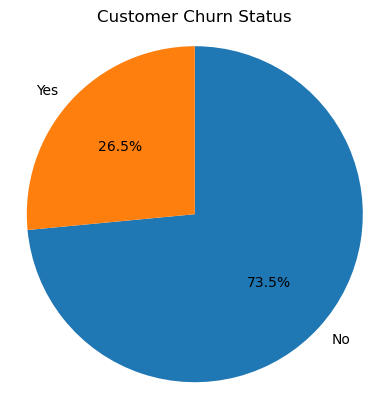

In [9]:
#Univariate exploration of StreamingMovies variable
plt.title("Customer Churn Status")
contract_counts = cd["Churn"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

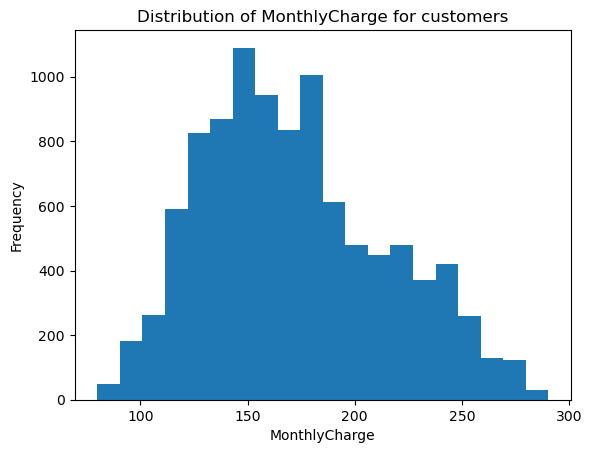

In [10]:
#Visual univariate exploration of MonthlyCharge variable
plt.title('Distribution of MonthlyCharge for customers')
plt.hist(data=cd, x="MonthlyCharge", bins = 20)
plt.xlabel('MonthlyCharge')
plt.ylabel("Frequency");

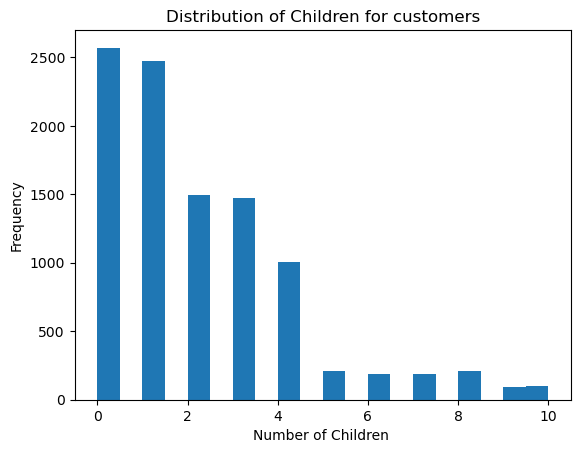

In [11]:
#Visual univariate exploration of Children variable
plt.title('Distribution of Children for customers')
plt.hist(data=cd, x="Children", bins = 20)
plt.xlabel('Number of Children ')
plt.ylabel("Frequency");

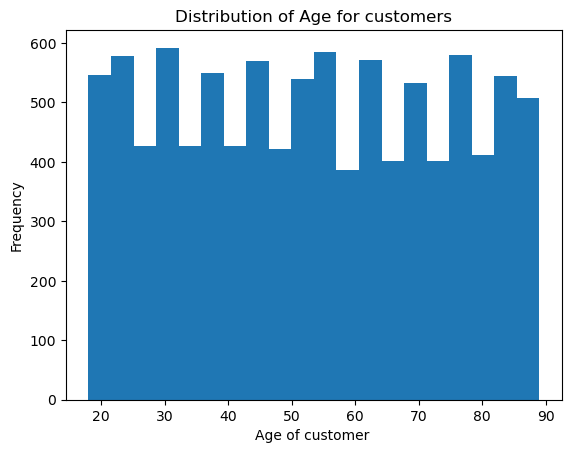

In [12]:
#Visual univariate exploration of Age variable
plt.title('Distribution of Age for customers')
plt.hist(data=cd, x="Age", bins = 20)
plt.xlabel('Age of customer ')
plt.ylabel("Frequency");

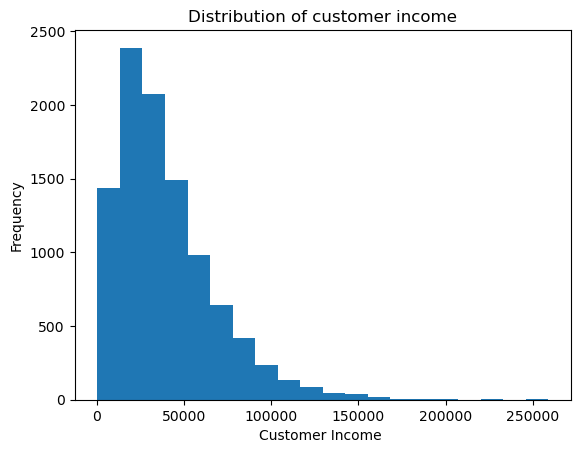

In [13]:
#Visual univariate exploration of Income variable
plt.title('Distribution of customer income')
plt.hist(data=cd, x="Income", bins = 20)
plt.xlabel('Customer Income ')
plt.ylabel("Frequency");

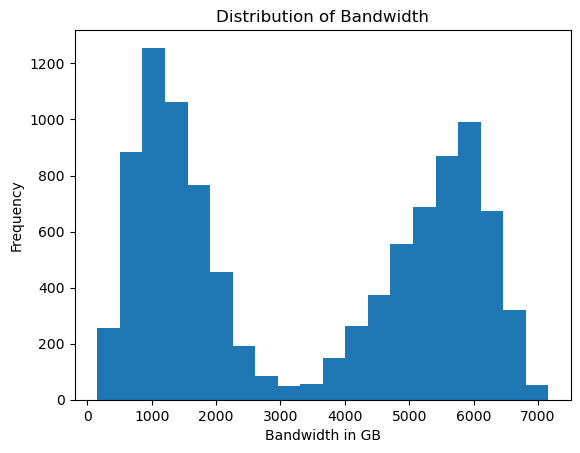

In [14]:
#Visual univariate exploration of Bandwidth_GB_Year variable
plt.title('Distribution of Bandwidth')
plt.hist(data=cd, x="Bandwidth_GB_Year", bins = 20)
plt.xlabel('Bandwidth in GB')
plt.ylabel("Frequency");

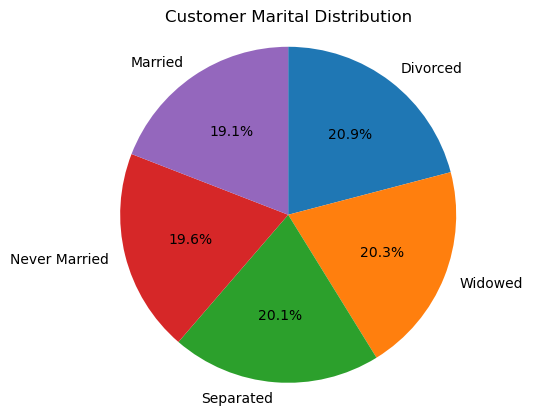

In [15]:
#Univariate exploration of Marital variable
plt.title("Customer Marital Distribution")
contract_counts = cd["Marital"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

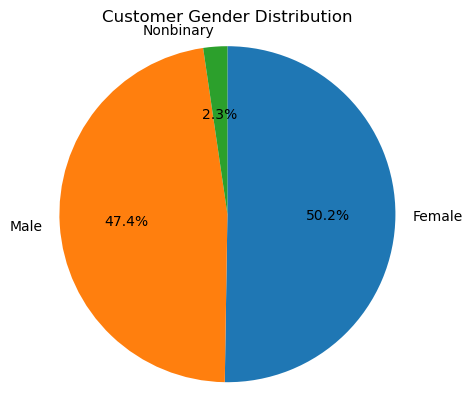

In [16]:
#Univariate exploration of Gender variable
plt.title("Customer Gender Distribution")
contract_counts = cd["Gender"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

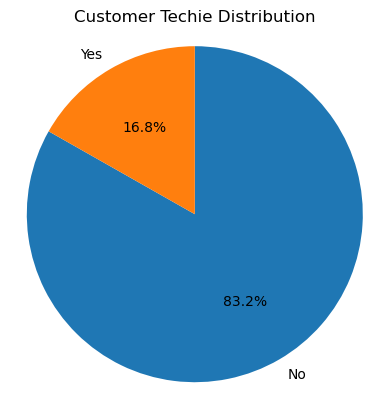

In [17]:
#Univariate exploration of Techie variable
plt.title("Customer Techie Distribution")
contract_counts = cd["Techie"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

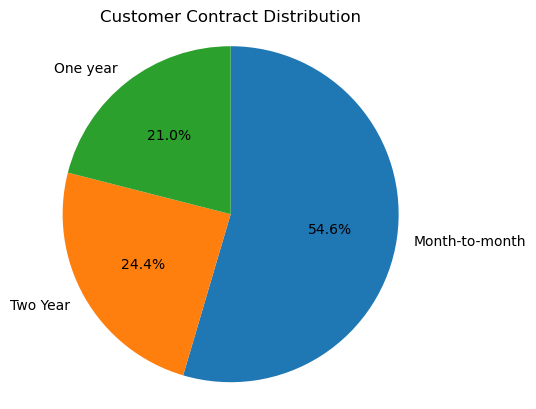

In [18]:
#Univariate exploration of Contract variable
plt.title("Customer Contract Distribution")
contract_counts = cd["Contract"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

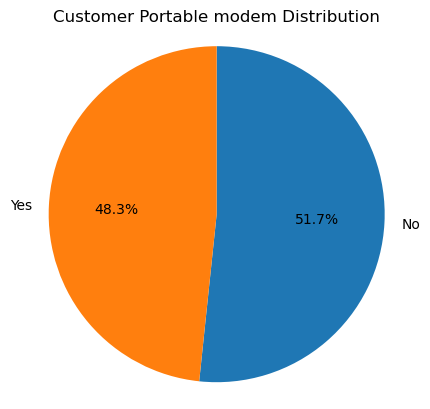

In [19]:
#Univariate exploration of Port_modem variable
plt.title("Customer Portable modem Distribution")
contract_counts = cd["Port_modem"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

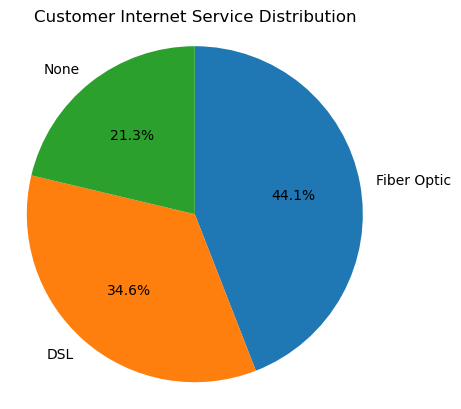

In [20]:
#Univariate exploration of InternetService variable
plt.title("Customer Internet Service Distribution")
contract_counts = cd["InternetService"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

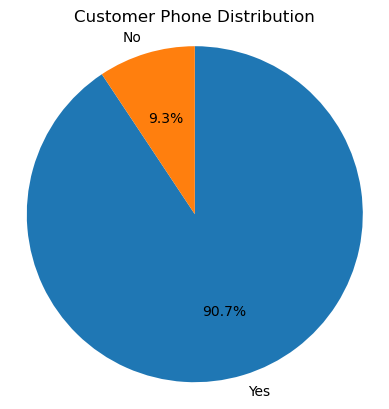

In [21]:
#Univariate exploration of Phone variable
plt.title("Customer Phone Distribution")
contract_counts = cd["Phone"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

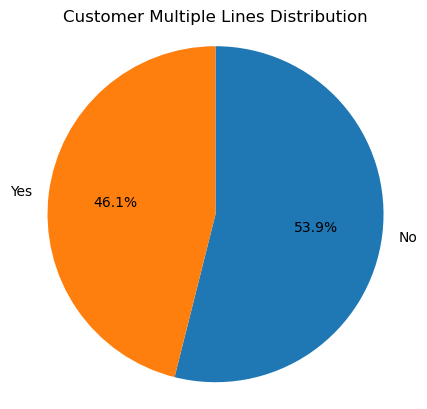

In [22]:
#Univariate exploration of Multiple variable
plt.title("Customer Multiple Lines Distribution")
contract_counts = cd["Multiple"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

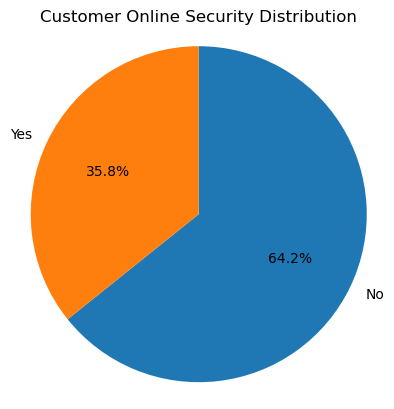

In [23]:
#Univariate exploration of OnlineSecurity variable
plt.title("Customer Online Security Distribution")
contract_counts = cd["OnlineSecurity"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

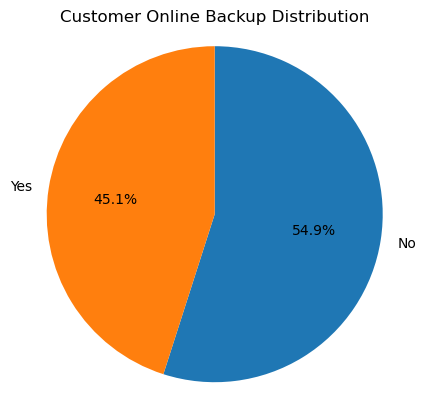

In [24]:
#Univariate exploration of OnlineBackup variable
plt.title("Customer Online Backup Distribution")
contract_counts = cd["OnlineBackup"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

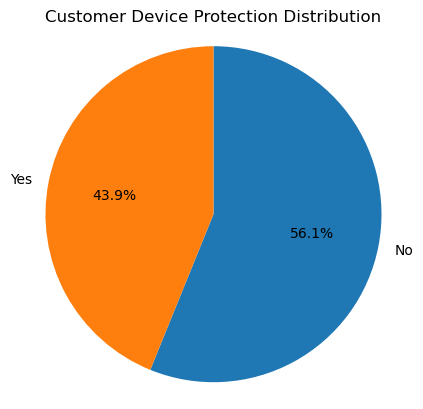

In [25]:
#Univariate exploration of DeviceProtection variable
plt.title("Customer Device Protection Distribution")
contract_counts = cd["DeviceProtection"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

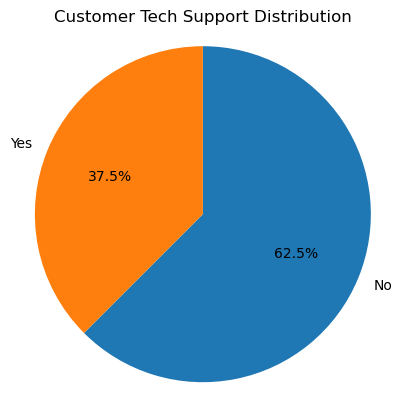

In [26]:
#Univariate exploration of TechSupport variable
plt.title("Customer Tech Support Distribution")
contract_counts = cd["TechSupport"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

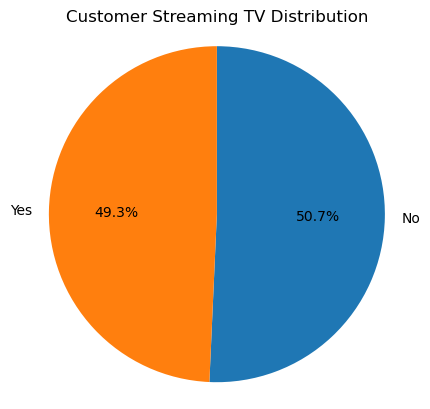

In [27]:
#Univariate exploration of StreamingTV variable
plt.title("Customer Streaming TV Distribution")
contract_counts = cd["StreamingTV"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

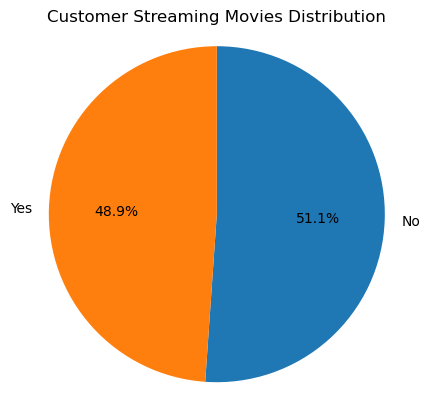

In [28]:
#Univariate exploration of StreamingMovies variable
plt.title("Customer Streaming Movies Distribution")
contract_counts = cd["StreamingMovies"].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

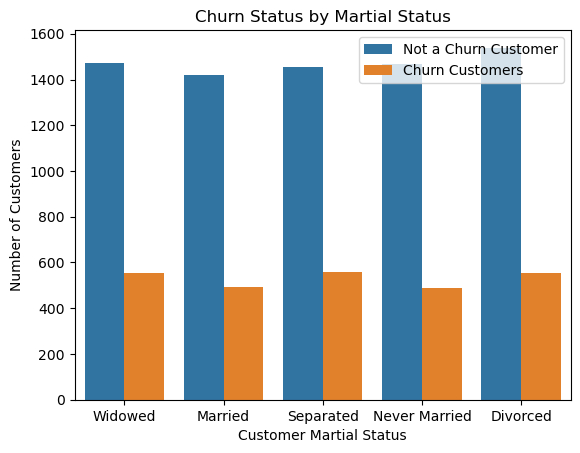

In [29]:
plt.title("Churn Status by Martial Status")
sns.countplot(data = cd, x="Marital", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer Martial Status")
plt.ylabel("Number of Customers");

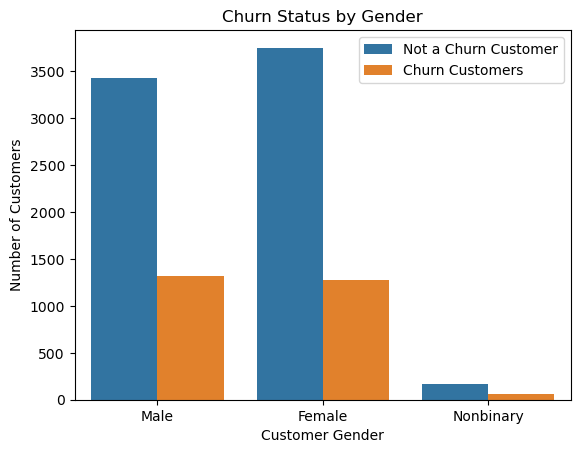

In [30]:
plt.title("Churn Status by Gender")
sns.countplot(data = cd, x="Gender", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer Gender")
plt.ylabel("Number of Customers");

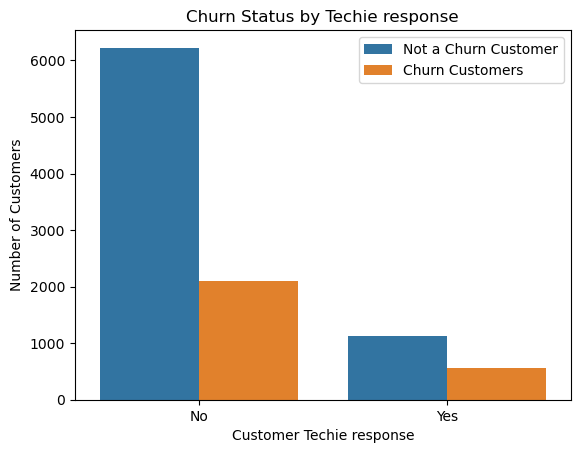

In [31]:
plt.title("Churn Status by Techie response")
sns.countplot(data = cd, x="Techie", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer Techie response")
plt.ylabel("Number of Customers");

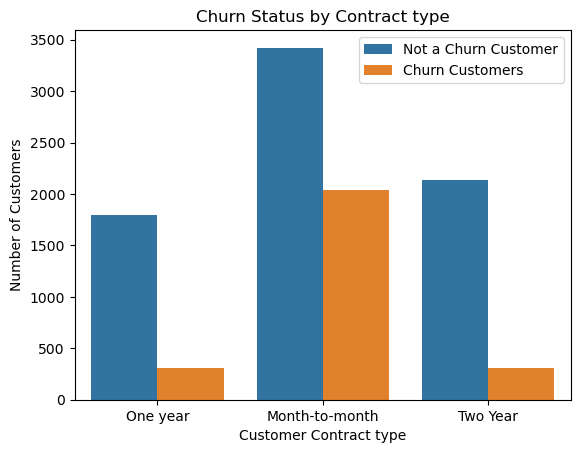

In [32]:
plt.title("Churn Status by Contract type")
sns.countplot(data = cd, x="Contract", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer Contract type")
plt.ylabel("Number of Customers");

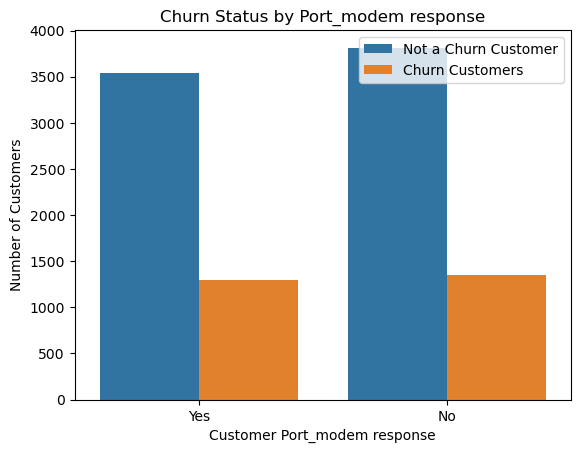

In [33]:
plt.title("Churn Status by Port_modem response")
sns.countplot(data = cd, x="Port_modem", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer Port_modem response")
plt.ylabel("Number of Customers");

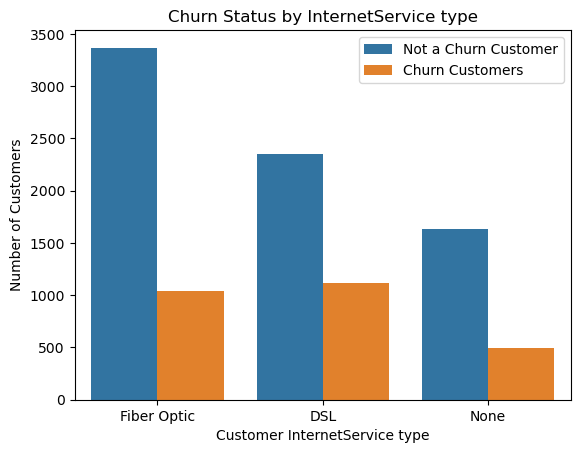

In [34]:
plt.title("Churn Status by InternetService type")
sns.countplot(data = cd, x="InternetService", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer InternetService type")
plt.ylabel("Number of Customers");

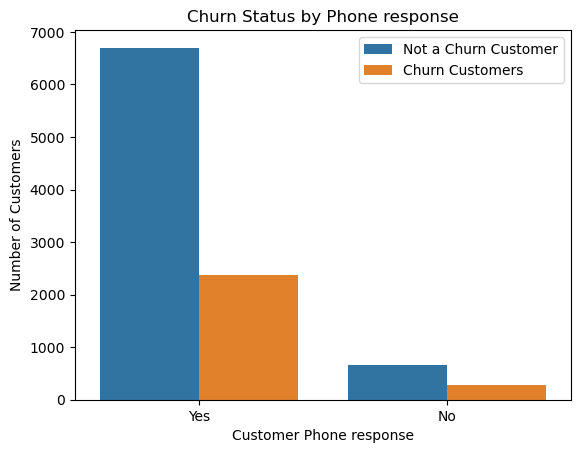

In [35]:
plt.title("Churn Status by Phone response")
sns.countplot(data = cd, x="Phone", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer Phone response")
plt.ylabel("Number of Customers");

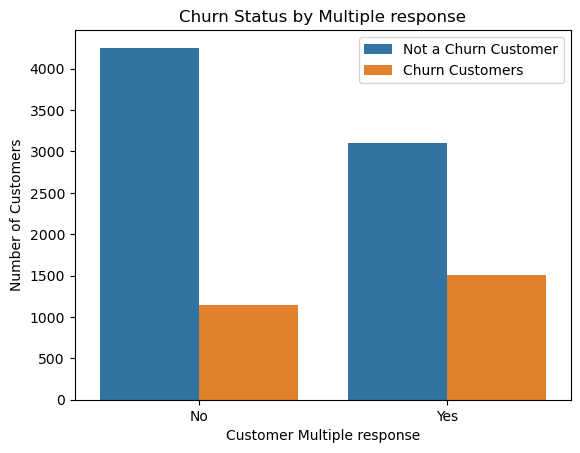

In [36]:
plt.title("Churn Status by Multiple response")
sns.countplot(data = cd, x="Multiple", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer Multiple response")
plt.ylabel("Number of Customers");

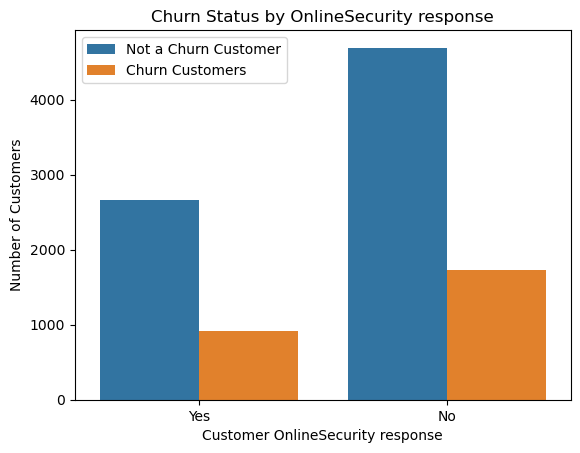

In [37]:
plt.title("Churn Status by OnlineSecurity response")
sns.countplot(data = cd, x="OnlineSecurity", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer OnlineSecurity response")
plt.ylabel("Number of Customers");

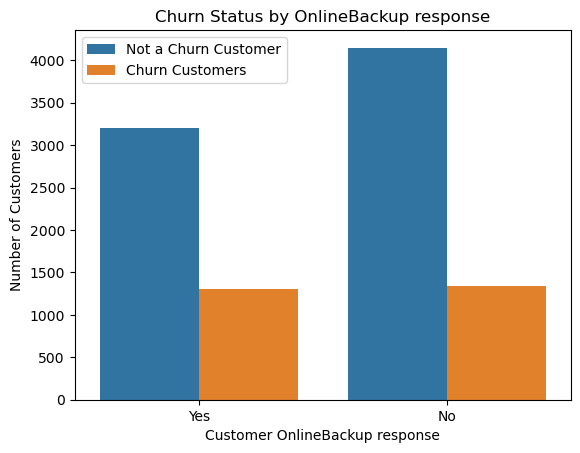

In [38]:
plt.title("Churn Status by OnlineBackup response")
sns.countplot(data = cd, x="OnlineBackup", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer OnlineBackup response")
plt.ylabel("Number of Customers");

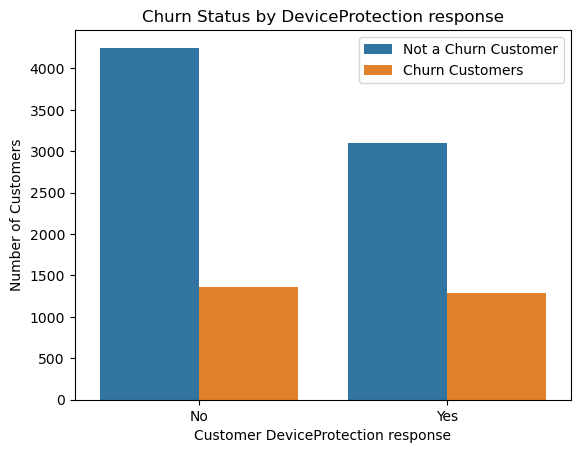

In [39]:
plt.title("Churn Status by DeviceProtection response")
sns.countplot(data = cd, x="DeviceProtection", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer DeviceProtection response")
plt.ylabel("Number of Customers");

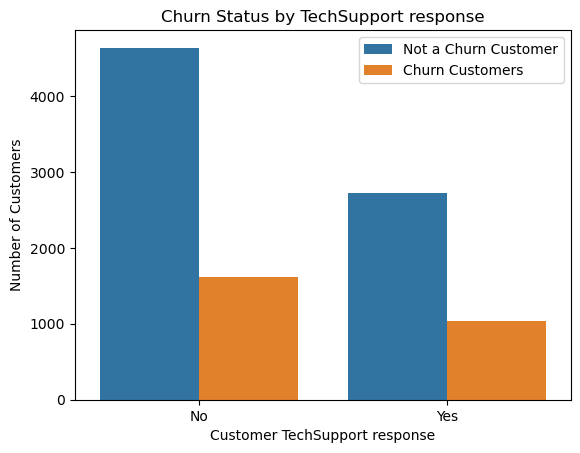

In [40]:
plt.title("Churn Status by TechSupport response")
sns.countplot(data = cd, x="TechSupport", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer TechSupport response")
plt.ylabel("Number of Customers");

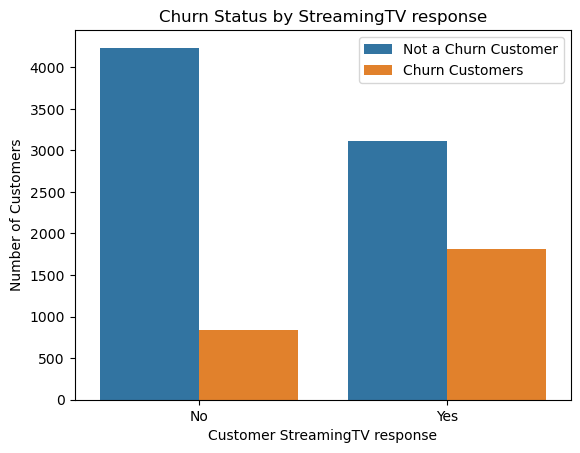

In [41]:
plt.title("Churn Status by StreamingTV response")
sns.countplot(data = cd, x="StreamingTV", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer StreamingTV response")
plt.ylabel("Number of Customers");

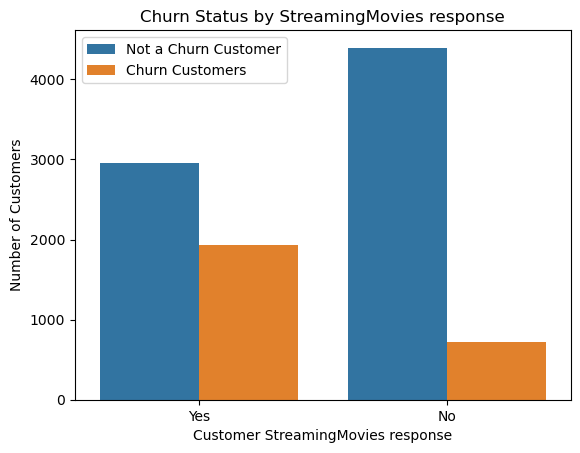

In [42]:
plt.title("Churn Status by StreamingMovies response")
sns.countplot(data = cd, x="StreamingMovies", hue="Churn")
plt.legend(["Not a Churn Customer", "Churn Customers"])
plt.xlabel("Customer StreamingMovies response")
plt.ylabel("Number of Customers");

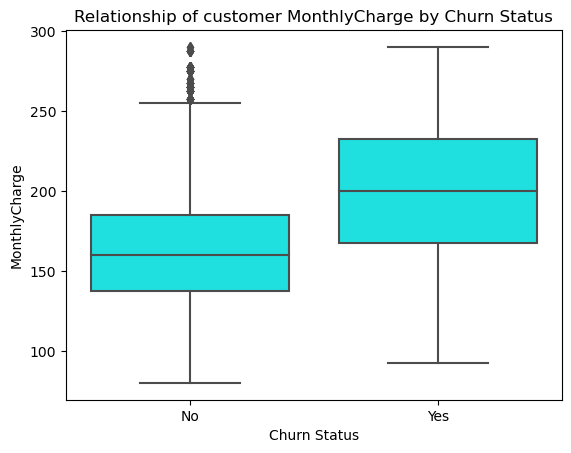

In [43]:
#Visual bivariate exploration of customer MonthlyCharge by Churn Status
plt.title("Relationship of customer MonthlyCharge by Churn Status")
sns.boxplot(data=cd, x= "Churn", y = "MonthlyCharge", color= "cyan")
plt.xlabel("Churn Status")
plt.ylabel("MonthlyCharge");

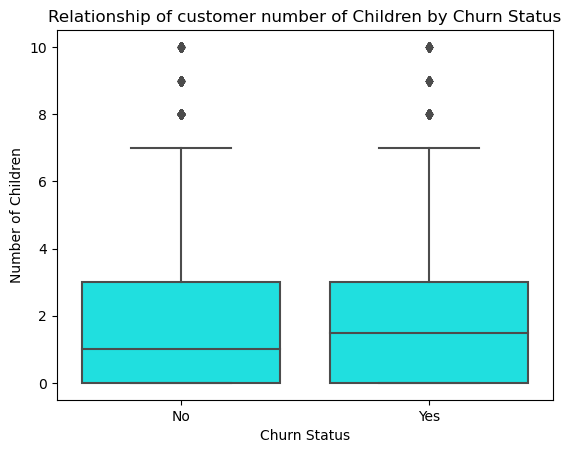

In [44]:
#Visual bivariate exploration of customer number of Children by Churn Status
plt.title("Relationship of customer number of Children by Churn Status")
sns.boxplot(data=cd, x= "Churn", y = "Children", color= "cyan")
plt.xlabel("Churn Status")
plt.ylabel("Number of Children");

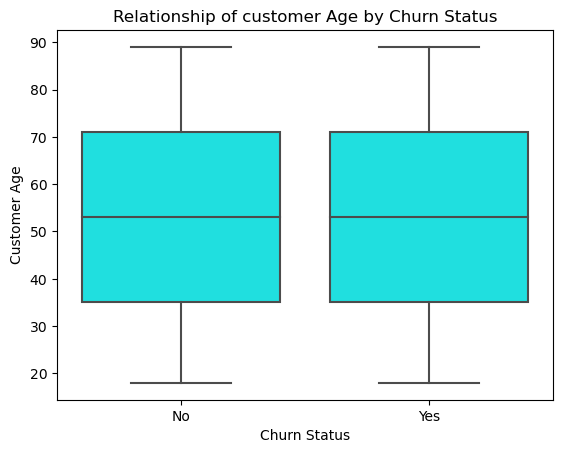

In [45]:
#Visual bivariate exploration of customer Age by Churn Status
plt.title("Relationship of customer Age by Churn Status")
sns.boxplot(data=cd, x= "Churn", y = "Age", color= "cyan")
plt.xlabel("Churn Status")
plt.ylabel("Customer Age");

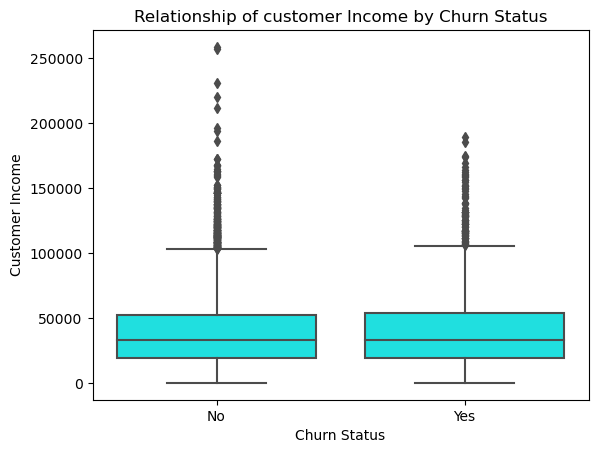

In [46]:
#Visual bivariate exploration of customer Income by Churn Status
plt.title("Relationship of customer Income by Churn Status")
sns.boxplot(data=cd, x= "Churn", y = "Income", color= "cyan")
plt.xlabel("Churn Status")
plt.ylabel("Customer Income");

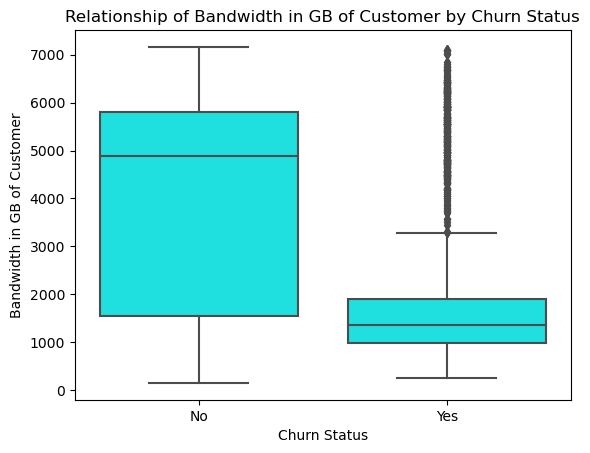

In [47]:
#Visual bivariate exploration of Bandwidth in GB of Customer by Churn Status
plt.title("Relationship of Bandwidth in GB of Customer by Churn Status")
sns.boxplot(data=cd, x= "Churn", y = "Bandwidth_GB_Year", color= "cyan")
plt.xlabel("Churn Status")
plt.ylabel("Bandwidth in GB of Customer");

In [48]:
#Creating mapping to turn Yes to 1 and No to 0 for the variables that have yes or no responses
bool_map = {"Yes" : 1, "No" : 0}

In [49]:
# Converting columns with the mapping I created
cd["Techie"] = cd["Techie"].map(bool_map)
cd["Port_modem"] = cd["Port_modem"].map(bool_map)
cd["Phone"] = cd["Phone"].map(bool_map)
cd["Multiple"] = cd["Multiple"].map(bool_map)
cd["OnlineSecurity"] = cd["OnlineSecurity"].map(bool_map)
cd["OnlineBackup"] = cd["OnlineBackup"].map(bool_map)
cd["DeviceProtection"] = cd["DeviceProtection"].map(bool_map)
cd["TechSupport"] = cd["TechSupport"].map(bool_map)
cd["StreamingTV"] = cd["StreamingTV"].map(bool_map)
cd["StreamingMovies"] = cd["StreamingMovies"].map(bool_map)
cd["Churn"] = cd["Churn"].map(bool_map)

In [50]:
#Making dummy values columns for Marital, Gender, Contract, and InternetService
Marital_dum = pd.get_dummies(data=cd["Marital"], drop_first=True)
Gender_dum = pd.get_dummies(data=cd["Gender"], drop_first=True)
Contract_dum = pd.get_dummies(data=cd["Contract"], drop_first=True)
InternetService_dum = pd.get_dummies(data=cd["InternetService"], drop_first=True)

In [51]:
# Create new dataset with only the wanted columns for the initial multiple linear regression
cd_log = cd[["Children", "Age", "Income", "Techie", "Port_modem", "Phone", "Multiple", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Bandwidth_GB_Year", "MonthlyCharge","Churn" ]]

In [52]:
#Inserting the dummy variables in cd_mlr
cd_log.insert(1, "Marital_Widowed", Marital_dum.Widowed)
cd_log.insert(1, "Marital_Married", Marital_dum.Married)
cd_log.insert(1, "Marital_Separated", Marital_dum.Separated)
cd_log.insert(1, "Marital_Never_Married", Marital_dum['Never Married'])
cd_log.insert(1, "Gender_Male", Gender_dum.Male)
cd_log.insert(1, "Gender_Nonbinary", Gender_dum.Nonbinary)
cd_log.insert(1, "Contract_One_year", Contract_dum['One year'])
cd_log.insert(1, "Contract_Two_year", Contract_dum['Two Year'])
cd_log.insert(1, "InternetService_None", InternetService_dum['None'])
cd_log.insert(1, "InternetService_Fiber_Optic", InternetService_dum['Fiber Optic'])

In [53]:
#Checking to make sure things look correct
cd_log

,Children,InternetService_Fiber_Optic,InternetService_None,Contract_Two_year,Contract_One_year,Gender_Nonbinary,Gender_Male,Marital_Never_Married,Marital_Separated,Marital_Married,...,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Bandwidth_GB_Year,MonthlyCharge,Churn
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,0,1,0,0,0,...,0,1,1,0,0,0,1,904.536110,172.455519,0
2,1,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,1,1,800.982766,242.632554,1
3,4,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,2054.706961,159.947583,0
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,2164.579412,119.956840,0
5,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,271.493436,149.948316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3,0,0,0,0,0,1,0,0,1,...,1,0,1,1,0,0,0,6511.252601,159.979400,0
9997,4,1,0,1,0,0,1,0,0,0,...,1,1,1,1,0,1,0,5695.951810,207.481100,0
9998,1,1,0,0,0,0,0,1,0,0,...,1,1,1,0,0,0,0,4159.305799,169.974100,0


In [54]:
cd_log.to_csv("C:/Users/cklni/Desktop/WGU/D208/log_churn.csv", index=False)

In [55]:
#Initial Logistic Regression

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Never_Married","Marital_Separated","Marital_Married","Marital_Widowed","Age","Income","Techie","Port_modem","Phone","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year","MonthlyCharge"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()

# Get AIC and BIC
aic = results.aic
bic = results.bic

# Display AIC and BIC
print("AIC:", aic)
print("BIC:", bic)


print(results.summary())

Optimization terminated successfully.
         Current function value: 0.219629
         Iterations 9
AIC: 4444.570817811332
BIC: 4632.0396674827125
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9974
Method:                           MLE   Df Model:                           25
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6202
Time:                        13:33:43   Log-Likelihood:                -2196.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                   

In [56]:
#Getting the Variance Inflation Factor (VIF)
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Never_Married","Marital_Separated","Marital_Married","Marital_Widowed","Age","Income","Techie","Port_modem","Phone","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year","MonthlyCharge"
]]

vif_cd = pd.DataFrame()
vif_cd["feature"] = X.columns

vif_cd["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_cd)

                        feature         VIF
0                      Children    1.938015
1   InternetService_Fiber_Optic    3.392803
2          InternetService_None    1.593294
3             Contract_Two_year    1.446820
4             Contract_One_year    1.385374
5              Gender_Nonbinary    1.046532
6                   Gender_Male    1.930446
7         Marital_Never_Married    1.897746
8             Marital_Separated    1.928948
9               Marital_Married    1.883252
10              Marital_Widowed    1.934078
11                          Age    7.226601
12                       Income    2.955560
13                       Techie    1.204060
14                   Port_modem    1.921267
15                        Phone    9.836872
16                     Multiple    4.151837
17               OnlineSecurity    1.588517
18                 OnlineBackup    2.956527
19             DeviceProtection    2.190065
20                  TechSupport    1.945142
21                  StreamingTV 

In [57]:
#Dropping MonthlyCharge and getting new VIF
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Never_Married","Marital_Separated","Marital_Married","Marital_Widowed","Age","Income","Techie","Port_modem","Phone","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]]

vif_cd = pd.DataFrame()
vif_cd["feature"] = X.columns

vif_cd["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_cd)

                        feature       VIF
0                      Children  1.901834
1   InternetService_Fiber_Optic  2.169590
2          InternetService_None  1.569033
3             Contract_Two_year  1.432930
4             Contract_One_year  1.373513
5              Gender_Nonbinary  1.045019
6                   Gender_Male  1.897491
7         Marital_Never_Married  1.811288
8             Marital_Separated  1.841128
9               Marital_Married  1.801948
10              Marital_Widowed  1.846596
11                          Age  6.221627
12                       Income  2.822913
13                       Techie  1.196543
14                   Port_modem  1.891092
15                        Phone  7.896419
16                     Multiple  1.813214
17               OnlineSecurity  1.540195
18                 OnlineBackup  1.792672
19             DeviceProtection  1.754084
20                  TechSupport  1.576649
21                  StreamingTV  1.934113
22              StreamingMovies  1

In [58]:
#Dropping Phone and getting new VIF
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Never_Married","Marital_Separated","Marital_Married","Marital_Widowed","Age","Income","Techie","Port_modem","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]]

vif_cd = pd.DataFrame()
vif_cd["feature"] = X.columns

vif_cd["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_cd)

                        feature       VIF
0                      Children  1.884636
1   InternetService_Fiber_Optic  2.126153
2          InternetService_None  1.544351
3             Contract_Two_year  1.425074
4             Contract_One_year  1.364876
5              Gender_Nonbinary  1.043601
6                   Gender_Male  1.877666
7         Marital_Never_Married  1.775083
8             Marital_Separated  1.797646
9               Marital_Married  1.752652
10              Marital_Widowed  1.803277
11                          Age  5.677548
12                       Income  2.760841
13                       Techie  1.193963
14                   Port_modem  1.873364
15                     Multiple  1.795372
16               OnlineSecurity  1.532070
17                 OnlineBackup  1.781609
18             DeviceProtection  1.750129
19                  TechSupport  1.568603
20                  StreamingTV  1.922235
21              StreamingMovies  1.906819
22            Bandwidth_GB_Year  3

In [59]:
#Dropping Age and getting new VIF
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Never_Married","Marital_Separated","Marital_Married","Marital_Widowed","Income","Techie","Port_modem","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]]

vif_cd = pd.DataFrame()
vif_cd["feature"] = X.columns

vif_cd["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_cd)

                        feature       VIF
0                      Children  1.874000
1   InternetService_Fiber_Optic  2.066203
2          InternetService_None  1.513905
3             Contract_Two_year  1.418300
4             Contract_One_year  1.358586
5              Gender_Nonbinary  1.043325
6                   Gender_Male  1.852209
7         Marital_Never_Married  1.722275
8             Marital_Separated  1.749366
9               Marital_Married  1.705176
10              Marital_Widowed  1.753594
11                       Income  2.684759
12                       Techie  1.191509
13                   Port_modem  1.848494
14                     Multiple  1.776361
15               OnlineSecurity  1.525308
16                 OnlineBackup  1.764664
17             DeviceProtection  1.732423
18                  TechSupport  1.550534
19                  StreamingTV  1.902054
20              StreamingMovies  1.882367
21            Bandwidth_GB_Year  3.092549


In [60]:
#Logistic Regression with MonthlyCharge, Phone, and Age removed because of VIF
#Start of Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Never_Married","Marital_Separated","Marital_Married","Marital_Widowed","Income","Techie","Port_modem","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224525
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6117
Time:                        13:34:32   Log-Likelihood:                -2245.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        0.0570      0.018      3.183      0.001   

In [61]:
#Logistic Regression with Marital_Never_Married removed due to it having the highest p-value
#Continuing the Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Separated","Marital_Married","Marital_Widowed","Income","Techie","Port_modem","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224531
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6117
Time:                        13:34:51   Log-Likelihood:                -2245.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        0.0571      0.018      3.186      0.001   

In [62]:
#Logistic Regression with OnlineSecurity removed due to it having the highest p-value
#Continuing the Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Separated","Marital_Married","Marital_Widowed","Income","Techie","Port_modem","Multiple","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224542
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6117
Time:                        13:34:54   Log-Likelihood:                -2245.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        0.0570      0.018      3.182      0.001   

In [63]:
#Logistic Regression with Income removed due to it having the highest p-value
#Continuing the Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Nonbinary","Gender_Male","Marital_Separated","Marital_Married","Marital_Widowed","Techie","Port_modem","Multiple","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224562
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6116
Time:                        13:34:57   Log-Likelihood:                -2245.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        0.0572      0.018      3.196      0.001   

In [64]:
#Logistic Regression with Gender_Nonbinary removed due to it having the highest p-value
#Continuing the Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Male","Marital_Separated","Marital_Married","Marital_Widowed","Techie","Port_modem","Multiple","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224586
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6116
Time:                        13:35:00   Log-Likelihood:                -2245.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        0.0572      0.018      3.195      0.001   

In [65]:
#Logistic Regression with Marital_Married removed due to it having the highest p-value
#Continuing the Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Male","Marital_Separated","Marital_Widowed","Techie","Port_modem","Multiple","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224638
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6115
Time:                        13:35:03   Log-Likelihood:                -2246.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        0.0572      0.018      3.196      0.001   

In [66]:
#Logistic Regression with Marital_Separated removed due to it having the highest p-value
#Continuing the Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Male","Marital_Widowed","Techie","Port_modem","Multiple","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224697
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6114
Time:                        13:35:07   Log-Likelihood:                -2247.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        0.0571      0.018      3.190      0.001   

In [67]:
#Logistic Regression with Port_modem removed due to it having the highest p-value
#Continuing the Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Male","Marital_Widowed","Techie","Multiple","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224803
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6112
Time:                        13:35:17   Log-Likelihood:                -2248.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        0.0573      0.018      3.204      0.001   

In [68]:
#Logistic Regression with Marital_Widowed removed due to it having the highest p-value
#Continuing the Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Male","Techie","Multiple","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224972
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6109
Time:                        13:35:21   Log-Likelihood:                -2249.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                        0.0573      0.018      3.201      0.001   

In [69]:
#Logistic Regression with Marital_Widowed removed due to it having the highest p-value
#Continuing the Backward Stepwise Elimination based on p-values no greater than 0.05

#Making y my dependent variable
y = cd_log.Churn
#Making X multiple independent variables
X = cd_log[["Children","InternetService_Fiber_Optic","InternetService_None","Contract_Two_year","Contract_One_year","Gender_Male","Techie","Multiple","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"
]].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()

# Get AIC and BIC
aic = results.aic
bic = results.bic

# Display AIC and BIC
print("AIC:", aic)
print("BIC:", bic)


print(results.summary())

Optimization terminated successfully.
         Current function value: 0.224972
         Iterations 9
AIC: 4529.447145270014
BIC: 4637.602250849656
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.6109
Time:                        13:35:27   Log-Likelihood:                -2249.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                    

In [70]:
#Create a confusion matrix
y_pred = results.predict(X)
y_pred_binary = (y_pred > 0.5).astype(int) 
conf_matrix = confusion_matrix(y, y_pred_binary)
print(conf_matrix)

[[6913  437]
 [ 548 2102]]


In [71]:
# Calculate accuracy using the confusion matrix
accuracy = accuracy_score(y, y_pred_binary)
print(accuracy)

0.9015
